### Theory

This notebook for testing vorticity budget terms from depth-integrated momentum budget terms from a JRA55 forced 1/4$^{\circ}$ MOM6 simulation.

In a non steady state, the following balance holds

\begin{equation}
\beta \overline{\int_{-H}^{\eta}vdz} = \dfrac{1}{\rho_o}\overline{J(p_b, H)} - \overline{\dfrac{fQ_m}{\rho_o}} + f\partial_t\eta - \nabla \wedge \int_{-H}^{\eta} \mathbf{u}dz + \dfrac{1}{\rho_o}\nabla \wedge\overline{\left(\boldsymbol{\tau_s - \tau_b}\right)} + \overline{\nabla \wedge \int_{-H}^{\eta}\mathbf{a}dz} + \overline{\nabla \wedge \int_{-H}^{\eta}\mathbf{b}dz} \tag{1}
\end{equation}

\begin{equation}
\beta \overline{V} = \dfrac{1}{\rho_o}\overline{J(p_b, H)} - f\overline{\dfrac{Q_m}{\rho_o}} + f\partial_t\eta - \nabla \wedge \mathcal{U}_t + \dfrac{1}{\rho_o}\nabla \wedge\overline{\left(\boldsymbol{\tau_s - \tau_b}\right)} + \overline{\nabla \wedge \mathcal{A}} + \overline{\nabla \wedge \mathcal{B}} \tag{2}
\end{equation}

All terms in equation (2) are computed using depth-integrated momentum diagnostics and saved in a separate nc file for analysis. Here, we isolate the relative contributions of these terms.

The following relation was used to compute bottom pressure torque term (first term on the RHS),

\begin{equation}
\dfrac{1}{\rho_o}\overline{J(p_b, H)} = \nabla \wedge\left[- f \hat{{\bf z}} \wedge \int_{-H}^{\eta} \mathbf{u}dz - \frac{1}{\rho_o}\int_{-H}^{\eta} \nabla pdz \right] + \beta \overline{V} + f\overline{\dfrac{Q_m}{\rho_o}} - f\partial_t\eta \tag{3}
\end{equation}

In [1]:
import xarray as xr
import numpy as np
from xgcm import Grid
import gcm_filters
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
def plot_sec(ax, da, vmin=-999, vmax=999, vstep=1, lat_lon_ext = [-180, 180, -85., 85.],
             lon='geolon', lat='geolat', cmap='RdBu_r', title='what is it?'):
    
    contours = np.arange(vmin, vmax+vstep, vstep)
    
    p = da.plot(ax=ax, x=lon, y=lat, vmin=vmin, vmax=vmax, cmap=cmap, 
                transform=ccrs.PlateCarree(), add_labels=False, add_colorbar=False)
    
    # add separate colorbar
    cb = plt.colorbar(p, ax=ax, extend='both', orientation="horizontal", shrink=0.6)
    cb.ax.tick_params(labelsize=12)
    
    ax.set_extent(lat_lon_ext, crs=ccrs.PlateCarree())
    
    # parallels/meridiens
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=2, color='gray', alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_right = False
    #gl.ylocator = mticker.FixedLocator([-80, -70, -60, -50, -40, -30])
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 12, 'color': 'black'}
    gl.ylabel_style = {'size': 12, 'color': 'black'}
    
    #ax.set_adjustable('datalim')
    
    ax.set_aspect(1.0)

    #p.axes.gridlines(color='black', alpha=0.5, linestyle='--')
    
    _ = plt.title(title, fontsize=14)
    return fig

#### Data and variables 

In [3]:
file_name = "OM4p25_JRA55_Vorticity_Budget_5yr.nc"
path1 = "/archive/Hemant.Khatri/MOM_Budget/OM4p25_JRA55/v3_FW_adjust_True/"

ds = xr.open_dataset(path1 + file_name)

In [4]:
print(ds)

<xarray.Dataset>
Dimensions:       (time: 11, xh: 1440, xq: 1440, yh: 1080, yq: 1080)
Coordinates:
  * xq            (xq) float64 -299.6 -299.3 -299.1 -298.9 ... 59.66 59.91 60.16
  * yq            (yq) float64 -80.35 -80.27 -80.19 -80.11 ... 89.78 89.89 90.0
  * time          (time) object 1960-07-02 00:00:00 ... 2010-07-02 12:00:00
  * xh            (xh) float64 -299.7 -299.5 -299.2 -299.0 ... 59.53 59.78 60.03
  * yh            (yh) float64 -80.39 -80.31 -80.23 -80.15 ... 89.73 89.84 89.95
Data variables:
    beta_V        (time, yq, xq) float64 ...
    BPT           (time, yq, xq) float64 ...
    Curl_Adv      (time, yq, xq) float64 ...
    Curl_taus     (time, yq, xq) float64 ...
    Curl_taub     (time, yq, xq) float64 ...
    Curl_diff     (time, yq, xq) float64 ...
    Mass_flux     (time, yq, xq) float64 ...
    eta_dt        (time, yq, xq) float32 ...
    Curl_dudt     (time, yq, xq) float64 ...
    Coriolis      (yq, xq) float32 ...
    areacello     (yh, xh) float32 ...
   

The vorticity budget variables are (the order is the same as in equation (2))

`beta_V` = `BPT` + `Mass_flux` + `eta_dt` + `Curl_dudt` + `Curl_taus` + `Curl_taub` + `Curl_Adv` + `Curl_diff`

In [5]:
print(ds.beta_V.attrs)
print(ds.BPT.attrs)
print(ds.Mass_flux.attrs)
print(ds.eta_dt.attrs)
print(ds.Curl_dudt.attrs)
print(ds.Curl_taus.attrs)
print(ds.Curl_taub.attrs)
print(ds.Curl_Adv.attrs)
print(ds.Curl_diff.attrs)

{'units': 'm/s^2', 'standard_name': 'Meridional Coriolis gradient x depth-integrated meridional velocity'}
{'units': 'm/s^2', 'standard_name': 'Bottom Pressure Torque'}
{'units': 'm/s^2', 'standard_name': ' - Coriolis x Surface mass flux / rho_0'}
{'units': 'm/s^2', 'standard_name': ' Coriolis x d(eta)/dt'}
{'units': 'm/s^2', 'standard_name': ' - Curl of depth-integrated du/dt'}
{'units': 'm/s^2', 'standard_name': 'Curl of Surface Wind Stress / rho_0'}
{'units': 'm/s^2', 'standard_name': '- Curl of bottom boundary stress / rho_0'}
{'units': 'm/s^2', 'standard_name': 'Curl of depth-integrated nonlinear advetion term'}
{'units': 'm/s^2', 'standard_name': 'Curl of depth-integrated horizontal diffusion'}


#### Testing in North Atlantic

In [10]:
%%time

ds1 = ds.sel(yh = slice(0,80.), yq = slice(0,80.), xh = slice(-100, 10.), xq = slice(-100, 10.)).mean('time')

BPT_2g = xr.Dataset() # new xarray dataset for Gaussian-filtered fields 
BPT_5g = xr.Dataset()

fldlist = ['beta_V', 'BPT','Mass_flux','eta_dt','Curl_dudt','Curl_taus','Curl_taub','Curl_Adv','Curl_diff']
dims = ['yq', 'xq']

area = ds1['areacello_bu']
wet_mask = ds1['wet_c']

# guassian filter over 2 deg diameter
filter_2Deg = gcm_filters.Filter(filter_scale=8, dx_min=1, filter_shape=gcm_filters.FilterShape.GAUSSIAN,
                              grid_type=gcm_filters.GridType.REGULAR_WITH_LAND,grid_vars={'wet_mask': wet_mask})

for fld in fldlist:
    
    tmp = filter_2Deg.apply(ds1[fld] * area, dims=dims)
    BPT_2g[fld] = (tmp/area).load().assign_coords({'geolat_c': ds1['geolat_c'], 'geolon_c': ds1['geolon_c']})

# guassian filter over 5 deg diameter
filter_5Deg = gcm_filters.Filter(filter_scale=20, dx_min=1, filter_shape=gcm_filters.FilterShape.GAUSSIAN,
                              grid_type=gcm_filters.GridType.REGULAR_WITH_LAND,grid_vars={'wet_mask': wet_mask})

for fld in fldlist:
    
    tmp = filter_5Deg.apply(ds1[fld] * area, dims=dims)
    BPT_5g[fld] = (tmp/area).load().assign_coords({'geolat_c': ds1['geolat_c'], 'geolon_c': ds1['geolon_c']})

CPU times: user 1.38 s, sys: 308 ms, total: 1.68 s
Wall time: 1.68 s


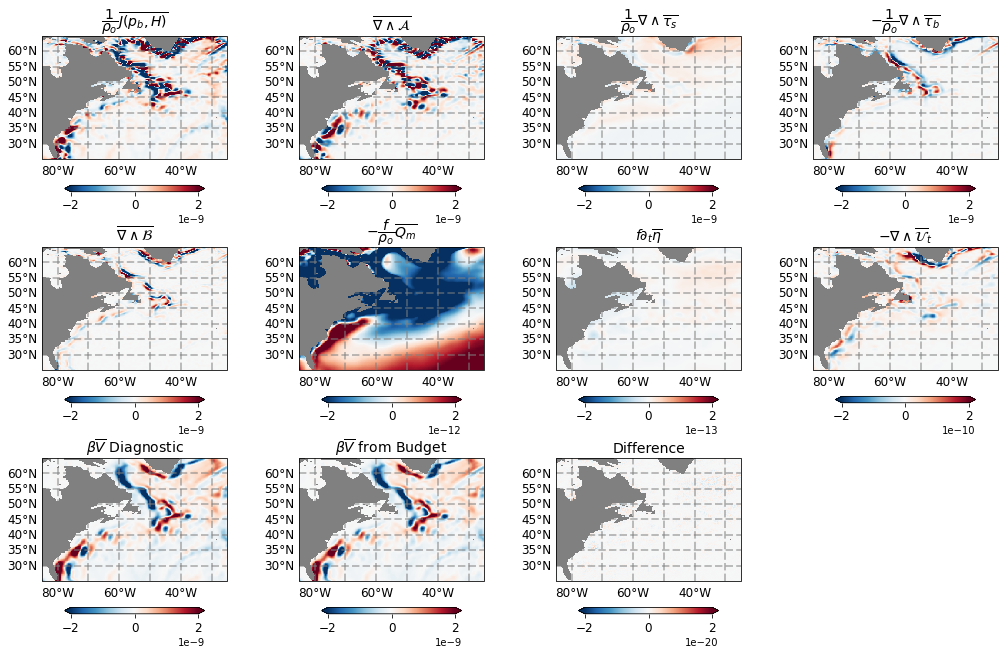

In [8]:
# 50-yr average plot 2 deg guassin

max_r = 2.e-9
lat_lon_ext = [-85., -25., 25., 65.]

grid1 = plt.GridSpec(3, 4, wspace=0.1, hspace=0.2)
fig = plt.figure(figsize=[18,11])

BPT_g = BPT_2g

BPT1 = BPT_g['BPT']
ax = fig.add_subplot(grid1[0, 0], projection=ccrs.PlateCarree(),facecolor='grey')
_ = plot_sec(ax, BPT1, vmin=-max_r, vmax=max_r, vstep=2.e-3*max_r, lat_lon_ext = lat_lon_ext,
                   lon='geolon_c', lat='geolat_c', cmap='RdBu_r', title=r'$\dfrac{1}{\rho_o}\overline{J(p_b, H)}$')

ax = fig.add_subplot(grid1[0, 1], projection=ccrs.PlateCarree(),facecolor='grey')
_ = plot_sec(ax, BPT_g['Curl_Adv'], vmin=-max_r, vmax=max_r, vstep=2.e-3*max_r, lat_lon_ext = lat_lon_ext,
                   lon='geolon_c', lat='geolat_c', cmap='RdBu_r', title=r'$\overline{\nabla \wedge \mathcal{A}}$')

ax = fig.add_subplot(grid1[0, 2], projection=ccrs.PlateCarree(),facecolor='grey')
_ = plot_sec(ax, BPT_g['Curl_taus'], vmin=-max_r, vmax=max_r, vstep=2.e-3*max_r, lat_lon_ext = lat_lon_ext,
                   lon='geolon_c', lat='geolat_c', cmap='RdBu_r', title=r'$\dfrac{1}{\rho_o}\nabla \wedge\overline{{\tau_s}}$')

ax = fig.add_subplot(grid1[0, 3], projection=ccrs.PlateCarree(),facecolor='grey')
_ = plot_sec(ax, BPT_g['Curl_taub'], vmin=-max_r, vmax=max_r, vstep=2.e-3*max_r, lat_lon_ext = lat_lon_ext,
                   lon='geolon_c', lat='geolat_c', cmap='RdBu_r', title=r'$-\dfrac{1}{\rho_o}\nabla \wedge\overline{{\tau_b}}$')

ax = fig.add_subplot(grid1[1, 0], projection=ccrs.PlateCarree(),facecolor='grey')
_ = plot_sec(ax, BPT_g['Curl_diff'], vmin=-max_r, vmax=max_r, vstep=2.e-3*max_r, lat_lon_ext = lat_lon_ext,
                   lon='geolon_c', lat='geolat_c', cmap='RdBu_r', title=r'$\overline{\nabla \wedge \mathcal{B}}$')

ax = fig.add_subplot(grid1[1, 1], projection=ccrs.PlateCarree(),facecolor='grey')
_ = plot_sec(ax, BPT_g['Mass_flux'], vmin=-0.001*max_r, vmax=0.001*max_r, vstep=2.e-3*max_r, lat_lon_ext = lat_lon_ext,
                   lon='geolon_c', lat='geolat_c', cmap='RdBu_r', title=r'$ - \dfrac{f}{\rho_o}\overline{Q_m}$')

ax = fig.add_subplot(grid1[1, 2], projection=ccrs.PlateCarree(),facecolor='grey')
_ = plot_sec(ax, BPT_g['eta_dt'], vmin=-0.0001*max_r, vmax=0.0001*max_r, vstep=2.e-3*max_r, lat_lon_ext = lat_lon_ext,
                   lon='geolon_c', lat='geolat_c', cmap='RdBu_r', title=r'$ f\partial_t\overline{\eta}$')

ax = fig.add_subplot(grid1[1, 3], projection=ccrs.PlateCarree(),facecolor='grey')
_ = plot_sec(ax, BPT_g['Curl_dudt'], vmin=-0.1*max_r, vmax=0.1*max_r, vstep=2.e-3*max_r, lat_lon_ext = lat_lon_ext,
                   lon='geolon_c', lat='geolat_c', cmap='RdBu_r', title=r'$ - \nabla \wedge \overline{\mathcal{U}}_t$')

ax = fig.add_subplot(grid1[2, 0], projection=ccrs.PlateCarree(),facecolor='grey')
_ = plot_sec(ax, BPT_g['beta_V'], vmin=-max_r, vmax=max_r, vstep=2.e-3*max_r, lat_lon_ext = lat_lon_ext,
                   lon='geolon_c', lat='geolat_c', cmap='RdBu_r', title=r'$\beta \overline{V}$ Diagnostic')

tmp = (BPT1 + BPT_g['Curl_Adv'] + BPT_g['Curl_taus'] + BPT_g['Curl_taub'] +
      BPT_g['Curl_diff'] + BPT_g['Mass_flux'] + BPT_g['eta_dt'] + BPT_g['Curl_dudt'])
ax = fig.add_subplot(grid1[2, 1], projection=ccrs.PlateCarree(),facecolor='grey')
_ = plot_sec(ax, tmp, vmin=-max_r, vmax=max_r, vstep=2.e-3*max_r, lat_lon_ext = lat_lon_ext,
                   lon='geolon_c', lat='geolat_c', cmap='RdBu_r', title=r'$\beta \overline{V}$ from Budget')

ax = fig.add_subplot(grid1[2, 2], projection=ccrs.PlateCarree(),facecolor='grey')
_ = plot_sec(ax, tmp - BPT_g['beta_V'], vmin=-1e-11*max_r, vmax=1e-11*max_r, vstep=2.e-3*max_r, lat_lon_ext = lat_lon_ext,
                   lon='geolon_c', lat='geolat_c', cmap='RdBu_r', title=r'Difference')

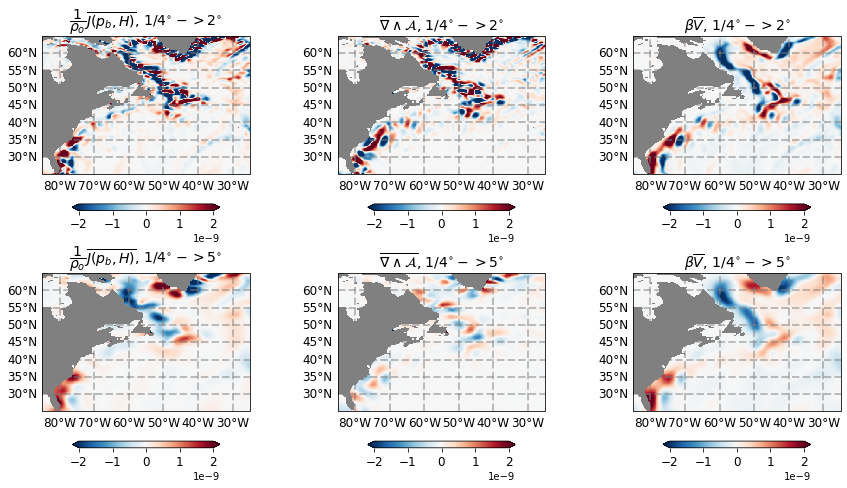

In [11]:
# Compare Filtering effect
max_r = 2.e-9
lat_lon_ext = [-85., -25., 25., 65.]

grid1 = plt.GridSpec(2, 3, wspace=0.2, hspace=0.2)
fig = plt.figure(figsize=[15,8])

d25_2D = BPT_2g

BPT1 = d25_2D['BPT']
ax = fig.add_subplot(grid1[0, 0], projection=ccrs.PlateCarree(),facecolor='grey')
_ = plot_sec(ax, BPT1, vmin=-max_r, vmax=max_r, vstep=2.e-3*max_r, lat_lon_ext = lat_lon_ext,
                   lon='geolon_c', lat='geolat_c', cmap='RdBu_r', title=r'$\dfrac{1}{\rho_o}\overline{J(p_b, H)}$, $1/4^{\circ} -> 2^{\circ}$')

ax = fig.add_subplot(grid1[0, 1], projection=ccrs.PlateCarree(),facecolor='grey')
_ = plot_sec(ax, d25_2D['Curl_Adv'], vmin=-max_r, vmax=max_r, vstep=2.e-3*max_r, lat_lon_ext = lat_lon_ext,
                   lon='geolon_c', lat='geolat_c', cmap='RdBu_r', title=r'$\overline{\nabla \wedge \mathcal{A}}$, $1/4^{\circ} -> 2^{\circ}$')

beta_V = d25_2D['beta_V'] 
ax = fig.add_subplot(grid1[0, 2], projection=ccrs.PlateCarree(),facecolor='grey')
_ = plot_sec(ax, beta_V, vmin=-max_r, vmax=max_r, vstep=2.e-3*max_r, lat_lon_ext = lat_lon_ext,
                   lon='geolon_c', lat='geolat_c', cmap='RdBu_r', title=r'$\beta \overline{V}$, $1/4^{\circ} -> 2^{\circ}$')

d25_5D = BPT_5g
BPT1 = d25_5D['BPT']
ax = fig.add_subplot(grid1[1, 0], projection=ccrs.PlateCarree(),facecolor='grey')
_ = plot_sec(ax, BPT1, vmin=-max_r, vmax=max_r, vstep=2.e-3*max_r, lat_lon_ext = lat_lon_ext,
                   lon='geolon_c', lat='geolat_c', cmap='RdBu_r', title=r'$\dfrac{1}{\rho_o}\overline{J(p_b, H)}$, $1/4^{\circ} -> 5^{\circ}$')

ax = fig.add_subplot(grid1[1, 1], projection=ccrs.PlateCarree(),facecolor='grey')
_ = plot_sec(ax, d25_5D['Curl_Adv'], vmin=-max_r, vmax=max_r, vstep=2.e-3*max_r, lat_lon_ext = lat_lon_ext,
                   lon='geolon_c', lat='geolat_c', cmap='RdBu_r', title=r'$\overline{\nabla \wedge \mathcal{A}}$, $1/4^{\circ} -> 5^{\circ}$')

beta_V = d25_5D['beta_V'] 
ax = fig.add_subplot(grid1[1, 2], projection=ccrs.PlateCarree(),facecolor='grey')
_ = plot_sec(ax, beta_V, vmin=-max_r, vmax=max_r, vstep=2.e-3*max_r, lat_lon_ext = lat_lon_ext,
                   lon='geolon_c', lat='geolat_c', cmap='RdBu_r', title=r'$\beta \overline{V}$, $1/4^{\circ} -> 5^{\circ}$')



#### Testing in Weddell Gyre region

In [34]:
ds1 = ds.sel(yh = slice(-85,-30.), yq = slice(-85,-29.7), xh = slice(-80, 60.), xq = slice(-79.8, 60.)).isel(time=0)

BPT_g = xr.Dataset() # new xarray dataset for Gaussian-filtered fields 

fldlist = ['beta_V', 'BPT','Mass_flux','eta_dt','Curl_dudt','Curl_taus','Curl_taub','Curl_Adv','Curl_diff']
dims = ['yq', 'xq']

area = ds1['areacello_bu']
wet_mask = ds1['wet_c']

# guassian filter over 1 deg diameter
filter_1Deg = gcm_filters.Filter(filter_scale=4, dx_min=1, filter_shape=gcm_filters.FilterShape.GAUSSIAN,
                              grid_type=gcm_filters.GridType.REGULAR_WITH_LAND,grid_vars={'wet_mask': wet_mask})

for fld in fldlist:
    
    tmp = filter_1Deg.apply(ds1[fld] * area, dims=dims)
    BPT_g[fld] = (tmp/area).load().assign_coords({'geolat_c': ds1['geolat_c'], 'geolon_c': ds1['geolon_c']})
    

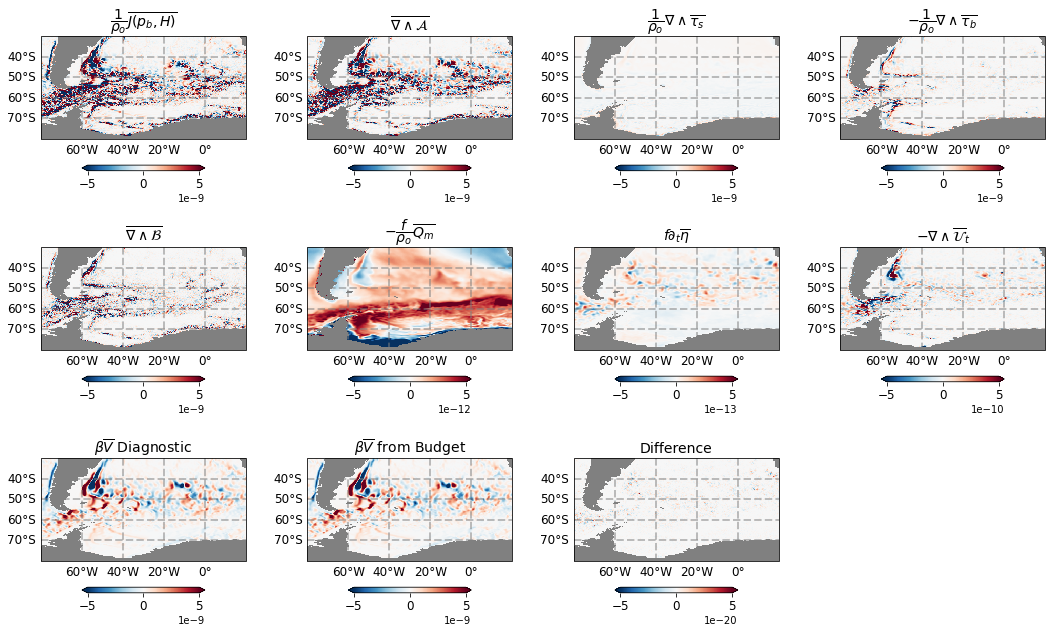

In [37]:
# 5-yr average plot

max_r = 5.e-9
lat_lon_ext = [-80., 20., -80., -30.]

grid1 = plt.GridSpec(3, 4, wspace=0.3, hspace=0.2)
fig = plt.figure(figsize=[18,11])

BPT1 = BPT_g['BPT']
ax = fig.add_subplot(grid1[0, 0], projection=ccrs.PlateCarree(),facecolor='grey')
_ = plot_sec(ax, BPT1, vmin=-max_r, vmax=max_r, vstep=2.e-3*max_r, lat_lon_ext = lat_lon_ext,
                   lon='geolon_c', lat='geolat_c', cmap='RdBu_r', title=r'$\dfrac{1}{\rho_o}\overline{J(p_b, H)}$')

ax = fig.add_subplot(grid1[0, 1], projection=ccrs.PlateCarree(),facecolor='grey')
_ = plot_sec(ax, BPT_g['Curl_Adv'], vmin=-max_r, vmax=max_r, vstep=2.e-3*max_r, lat_lon_ext = lat_lon_ext,
                   lon='geolon_c', lat='geolat_c', cmap='RdBu_r', title=r'$\overline{\nabla \wedge \mathcal{A}}$')

ax = fig.add_subplot(grid1[0, 2], projection=ccrs.PlateCarree(),facecolor='grey')
_ = plot_sec(ax, BPT_g['Curl_taus'], vmin=-max_r, vmax=max_r, vstep=2.e-3*max_r, lat_lon_ext = lat_lon_ext,
                   lon='geolon_c', lat='geolat_c', cmap='RdBu_r', title=r'$\dfrac{1}{\rho_o}\nabla \wedge\overline{{\tau_s}}$')

ax = fig.add_subplot(grid1[0, 3], projection=ccrs.PlateCarree(),facecolor='grey')
_ = plot_sec(ax, BPT_g['Curl_taub'], vmin=-max_r, vmax=max_r, vstep=2.e-3*max_r, lat_lon_ext = lat_lon_ext,
                   lon='geolon_c', lat='geolat_c', cmap='RdBu_r', title=r'$-\dfrac{1}{\rho_o}\nabla \wedge\overline{{\tau_b}}$')

ax = fig.add_subplot(grid1[1, 0], projection=ccrs.PlateCarree(),facecolor='grey')
_ = plot_sec(ax, BPT_g['Curl_diff'], vmin=-max_r, vmax=max_r, vstep=2.e-3*max_r, lat_lon_ext = lat_lon_ext,
                   lon='geolon_c', lat='geolat_c', cmap='RdBu_r', title=r'$\overline{\nabla \wedge \mathcal{B}}$')

ax = fig.add_subplot(grid1[1, 1], projection=ccrs.PlateCarree(),facecolor='grey')
_ = plot_sec(ax, BPT_g['Mass_flux'], vmin=-0.001*max_r, vmax=0.001*max_r, vstep=2.e-3*max_r, lat_lon_ext = lat_lon_ext,
                   lon='geolon_c', lat='geolat_c', cmap='RdBu_r', title=r'$ - \dfrac{f}{\rho_o}\overline{Q_m}$')

ax = fig.add_subplot(grid1[1, 2], projection=ccrs.PlateCarree(),facecolor='grey')
_ = plot_sec(ax, BPT_g['eta_dt'], vmin=-0.0001*max_r, vmax=0.0001*max_r, vstep=2.e-3*max_r, lat_lon_ext = lat_lon_ext,
                   lon='geolon_c', lat='geolat_c', cmap='RdBu_r', title=r'$ f\partial_t\overline{\eta}$')

ax = fig.add_subplot(grid1[1, 3], projection=ccrs.PlateCarree(),facecolor='grey')
_ = plot_sec(ax, BPT_g['Curl_dudt'], vmin=-0.1*max_r, vmax=0.1*max_r, vstep=2.e-3*max_r, lat_lon_ext = lat_lon_ext,
                   lon='geolon_c', lat='geolat_c', cmap='RdBu_r', title=r'$ - \nabla \wedge \overline{\mathcal{U}}_t$')

ax = fig.add_subplot(grid1[2, 0], projection=ccrs.PlateCarree(),facecolor='grey')
_ = plot_sec(ax, BPT_g['beta_V'], vmin=-max_r, vmax=max_r, vstep=2.e-3*max_r, lat_lon_ext = lat_lon_ext,
                   lon='geolon_c', lat='geolat_c', cmap='RdBu_r', title=r'$\beta \overline{V}$ Diagnostic')

tmp = (BPT1 + BPT_g['Curl_Adv'] + BPT_g['Curl_taus'] + BPT_g['Curl_taub'] +
      BPT_g['Curl_diff'] + BPT_g['Mass_flux'] + BPT_g['eta_dt'] + BPT_g['Curl_dudt'])
ax = fig.add_subplot(grid1[2, 1], projection=ccrs.PlateCarree(),facecolor='grey')
_ = plot_sec(ax, tmp, vmin=-max_r, vmax=max_r, vstep=2.e-3*max_r, lat_lon_ext = lat_lon_ext,
                   lon='geolon_c', lat='geolat_c', cmap='RdBu_r', title=r'$\beta \overline{V}$ from Budget')

ax = fig.add_subplot(grid1[2, 2], projection=ccrs.PlateCarree(),facecolor='grey')
_ = plot_sec(ax, tmp - BPT_g['beta_V'], vmin=-1e-11*max_r, vmax=1e-11*max_r, vstep=2.e-3*max_r, lat_lon_ext = lat_lon_ext,
                   lon='geolon_c', lat='geolat_c', cmap='RdBu_r', title=r'Difference')